### DS 4420 - Homework 4
Gavin Wainwright

In [17]:
import numpy as np
from matplotlib import pyplot as plt

#### Question 1

In [47]:
# Part 1
X = np.genfromtxt('complex_distribution.csv')

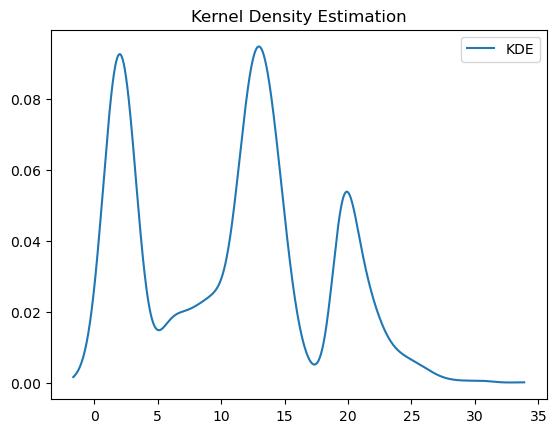

In [48]:
def gaussian_kernel(x, x_i, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - x_i) / bandwidth) ** 2)

def kde(x, data, bandwidth):
    return np.sum(gaussian_kernel(x, data[:, None], bandwidth), axis=0) / data.size

# Compute KDE
n_samples = 1000
x = np.linspace(min(X), max(X), n_samples)
bandwidth = 0.8
density = kde(x, X, bandwidth)

plt.plot(x, density, label='KDE')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

In [58]:
# Part 2
def rejection_sampling(kde_func, data, bandwidth, n_samples):
    samples = []
    max_density = max(kde_func(x, data, bandwidth))
    while len(samples) < n_samples:
        z = np.random.uniform(min(data), max(data))
        u = np.random.uniform(0, max_density)
        if u <= kde_func(z, data, bandwidth):
            samples.append(z)

    return np.array(samples)

X_hat = rejection_sampling(kde, X, bandwidth, n_samples)

In [59]:
def kde_sampling(data, bandwidth, n_samples):
    indices = np.random.choice(len(data), size=n_samples)
    samples = data[indices]
    noise = np.random.normal(0, bandwidth, size=n_samples)
    return samples + noise

X_bar = kde_sampling(X, bandwidth, n_samples)

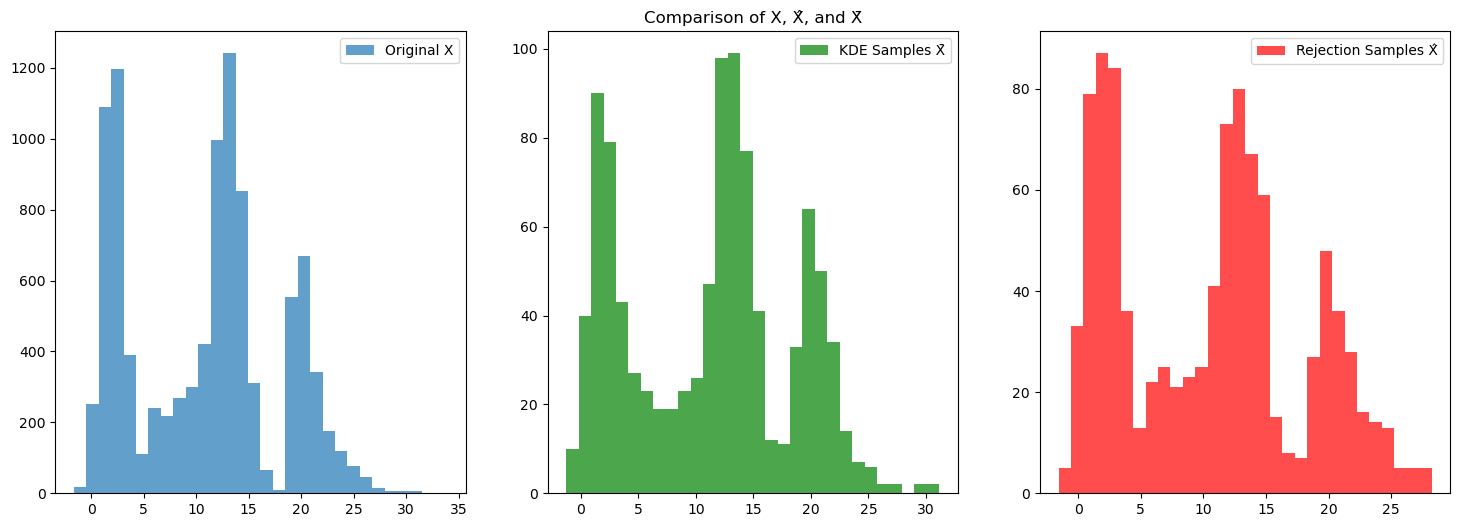

In [60]:
plt.figure(figsize=(18, 6))

# Original Data
plt.subplot(1, 3, 1)
plt.hist(X, bins=30, alpha=0.7, label='Original X')
plt.legend()

# Rejection Sampling
plt.subplot(1, 3, 3)
plt.hist(X_hat, bins=30, alpha=0.7, color='red', label='Rejection Samples X̂')
plt.legend()

# KDE Sampling
plt.subplot(1, 3, 2)
plt.hist(X_bar, bins=30, alpha=0.7, color='green', label='KDE Samples X̄')
plt.legend()

plt.title('Comparison of X, X̂, and X̄')
plt.show()

In [80]:
# Part 3
print('Original X\n')
print(f'E[x]: {np.mean(X)}')
print(f'E[(x - μ^2)]: {np.var(X)}')
print(f'E[3x + 2]: {np.mean(3*X + 2)}')
print(f'E[x^2 - 5x]: {np.mean(X**2 - 5*X)}')
print(f'E[2e^x + 1]: {np.mean(2 * np.exp(X) + 1)}')

Original X

E[x]: 10.814000119911924
E[(x - μ^2)]: 49.40961360042826
E[3x + 2]: 34.44200035973577
E[x^2 - 5x]: 112.28221159432371
E[2e^x + 1]: 258969297984.54385


In [81]:
print('Rejection Samples X̂\n')
print(f'E[x]: {np.mean(X_bar)}')
print(f'E[(x - μ^2)]: {np.var(X_bar)}')
print(f'E[3x + 2]: {np.mean(3*X_bar + 2)}')
print(f'E[x^2 - 5x]: {np.mean(X_bar**2 - 5*X_bar)}')
print(f'E[2e^x + 1]: {np.mean(2 * np.exp(X_bar) + 1)}')

Rejection Samples X̂

E[x]: 11.204183160158674
E[(x - μ^2)]: 50.564186341849556
E[3x + 2]: 35.61254948047603
E[x^2 - 5x]: 120.07699082743942
E[2e^x + 1]: 171185077499.10504


In [82]:
print('KDE Samples X̄\n')
print(f'E[x]: {np.mean(X_hat)}')
print(f'E[(x - μ^2)]: {np.var(X_hat)}')
print(f'E[3x + 2]: {np.mean(3*X_hat + 2)}')
print(f'E[x^2 - 5x]: {np.mean(X_hat**2 - 5*X_hat)}')
print(f'E[2e^x + 1]: {np.mean(2 * np.exp(X_hat) + 1)}')

KDE Samples X̄

E[x]: 10.449282595727611
E[(x - μ^2)]: 54.06075268761185
E[3x + 2]: 33.34784778718283
E[x^2 - 5x]: 111.00184647434973
E[2e^x + 1]: 16949254245.665464


#### Question 2

In [90]:
def f(x):
    return np.log(x + 1)

x_samples = np.random.uniform(0, 2, 100000)

f_values = f(x_samples)

integral = 2 * np.mean(f_values)

print(integral)

1.2975505554642717


#### Question 3

In [91]:
def f(x):
    return x**2 - x + 1

x_samples = np.random.uniform(0, 1, 100000)

f_values = f(x_samples)

integral = 2 * np.mean(f_values)

print(integral)

1.6669491526721298
